In [176]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 

### Preparing Data

In [177]:
rawData = np.genfromtxt('housing.data')
N, pp1 = rawData.shape
# Last column is target
X = np.array(rawData[:,:-1])
y = np.array(rawData[:,-1])
print(X.shape, y.shape)

(506, 13) (506,)


### Linear Regression

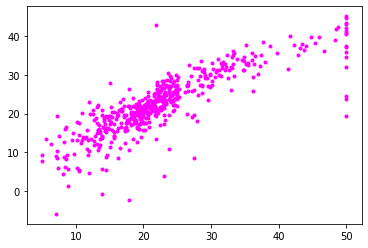

In [178]:
# Solve linear regression, plot target and prediction
w = np.linalg.inv(X.T@X) @ X.T @ y
yh_lin = X@w
plt.plot(y, yh_lin, '.', Color='magenta')
plt.show()

### Radial Basis Functions

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

In [181]:
# J = 20 basis functions obtained by k-means clustering
# sigma set to standard deviation of entire data

J = 20
kmeans = KMeans(n_clusters=J, random_state=0).fit(X_train)
sig = np.std(X_train)
print('sigma', sig)

# Construct design matrix
N = X_train.shape[0]
U = np.zeros((N,J))
for i in range(N):
    for j in range(J):
        U[i][j] = gaussian(X_train[i], kmeans.cluster_centers_[j], sig)

sigma 144.1507415886418


In [182]:
# Solve RBF model, predict and plot
w = np.linalg.inv(np.dot(U.T,U)) @ U.T @ y_train
yh_rbf = U@w
print(np.linalg.norm(y-yh_lin), np.linalg.norm(y_train-yh_rbf))

110.58049674804326 155.5542382920927


#### Test RBF

110.58049674804326 57.6972156865132


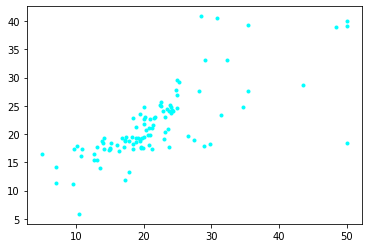

In [183]:
N = X_test.shape[0]
U = np.zeros((N,J))
for i in range(N):
    for j in range(J):
        U[i][j] = gaussian(X_test[i], kmeans.cluster_centers_[j], sig)

        
w = np.linalg.inv(np.dot(U.T,U)) @ U.T @ y_test
yh_rbf = U@w        
plt.plot(y_test, yh_rbf, '.', Color='cyan')

print(np.linalg.norm(y-yh_lin), np.linalg.norm(y_test-yh_rbf))

### Gradient Descent

In [184]:
# J = 20 basis functions obtained by k-means clustering
# sigma set to standard deviation of entire data

J = 20
kmeans = KMeans(n_clusters=J, random_state=0).fit(X_train)
sig = np.std(X_train)
print('sigma', sig)

# Construct design matrix
N = X_train.shape[0]
U = np.zeros((N,J))
for i in range(N):
    for j in range(J):
        U[i][j] = gaussian(X_train[i], kmeans.cluster_centers_[j], sig)

sigma 144.1507415886418


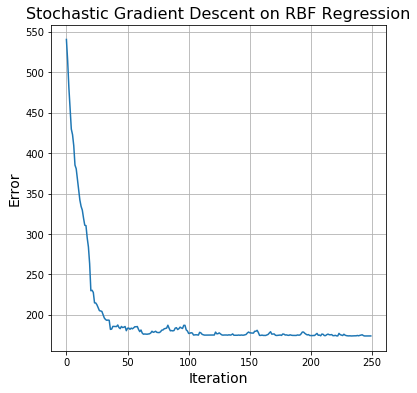

Residual Error (Initial) : 540.52
Residual Error (Converged): 173.96


In [185]:
MaxIter = 250
lRate = 0.01
Eplot = np.zeros((MaxIter, 1))
w = np.random.randn(J) # Random initialization
beta = 0.9 # momentum parameter
v = np.zeros_like(w) # initial velocity

for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = U[j,:]
    yj = y_train[j]
    v = (beta * v) + (1-beta) * (xj.T * (xj @ w - yj)) # velocity
    w = w - lRate * xj.T * (xj @ w - yj)
    Eplot[iter] = np.linalg.norm(U @ w - y_train)
    

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Error", fontsize=14)
ax.grid(True)
ax.set_title("Stochastic Gradient Descent on RBF Regression",fontsize=16)
plt.show()
             
print("Residual Error (Initial) : %3.2f" %(Eplot[0]))
print("Residual Error (Converged): %3.2f" %(Eplot[MaxIter-1]))

### Using Wine Quality Dataset

In [208]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [209]:
y = np.array(df['quality'].values)
X = df.values[:,:11]
X = (X - X.mean(axis=0)) / X.std(axis=0)
n, p = X.shape

In [210]:
J = 100
kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
sig = np.std(X)
print('sigma', sig)

# Construct design matrix
N = X.shape[0]
U = np.zeros((N,J))
for i in range(N):
    for j in range(J):
        U[i][j] = gaussian(X[i], kmeans.cluster_centers_[j], sig)

sigma 1.0


#### Closed Form Linear Regrssion

In [211]:
w = np.linalg.inv(U.T @ U) @ U.T @ y

y_train_pred = U @ w

# Error from the model
#
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_train_pred, y)))
print("Residual Error (train): %3.2f" %(np.linalg.norm(y_train_pred - y)))

Root Mean Squared Error (train): 0.6773116642613857
Residual Error (train): 27.08


#### Stochastic Gradient Descent

Root Mean Squared Error (train): 1.2559489902085454
Residual Error (train): 50.22


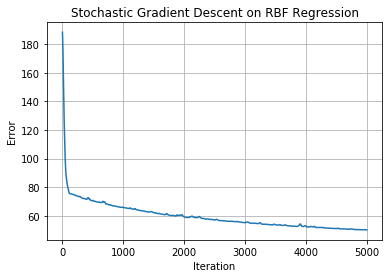

In [216]:
MaxIter = 5000
lRate = 0.01
Eplot = np.zeros((MaxIter, 1))
w = np.random.randn(J)
v = np.zeros_like(w)
beta = 0.9

for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int)
    xj = U[j,:]
    yj = y[j]
    v = (beta * v) + (1-beta) * (xj.T * (xj @ w - yj)) # velocity
    w = w - lRate * v
    Eplot[iter] = np.linalg.norm(U @ w - y)

y_pred = U @ w

# Error from the model
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(y_pred, y)))
print("Residual Error (train): %3.2f" %(np.linalg.norm(y_pred - y)))

fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Stochastic Gradient Descent on RBF Regression")
plt.show()